In [104]:
import numpy as np
import eval7

from typing import Tuple, List
import random


Card = eval7.Card
_cards = eval7.Deck().cards


def ochs(hand: Tuple[Card, Card], villains: List[Tuple[Tuple[Card, Card], ...]], community: Tuple[Card, ...]):
    hist = np.empty(len(villains))
    for i, cluster in enumerate(villains):
        strength = 0
        for villain in cluster:
            strength += eval7.ochs(hand, villain, community, 100) / len(cluster)
        hist[i] = strength
    return hist

In [105]:
from blood.basic import colorsuited, preflop
from zerosum.pkr.game import RiverOfBlood, Draw

from collections import defaultdict
from itertools import combinations

In [132]:
label = {}

for i, j in combinations(range(52), 2):
    g = RiverOfBlood().apply(Draw((i, j))).apply(Draw((i, j)))
    iset = g.infoset(g.active)
    label[i, j] = (colorsuited * preflop)(iset)
    # label[i, j] = preflop(iset)

clusters = defaultdict(list)
for (i, j), l in label.items():
    clusters[l].append((_cards[i], _cards[j]))

clusters = list(map(tuple, clusters.values()))

In [133]:
from tqdm import tqdm
import matplotlib.pyplot as plt

In [138]:
vecs = []

for _ in tqdm(range(1000)):
    cards = random.sample(_cards, k=8)
    hand, comm = cards[:2], cards[2:]
    vecs.append(ochs(hand, clusters, comm))

vecs = np.asarray(vecs)

100%|██████████| 1000/1000 [00:04<00:00, 229.18it/s]


In [139]:
from zerosum.pkr.abstraction.kmeans import kmeanspp, kmeans

In [140]:
def l2(a, b):
    return np.linalg.norm(a - b)

centroids = kmeanspp(vecs, 50, l2)
centroids, labels = kmeans(vecs, centroids, 1000, l2)

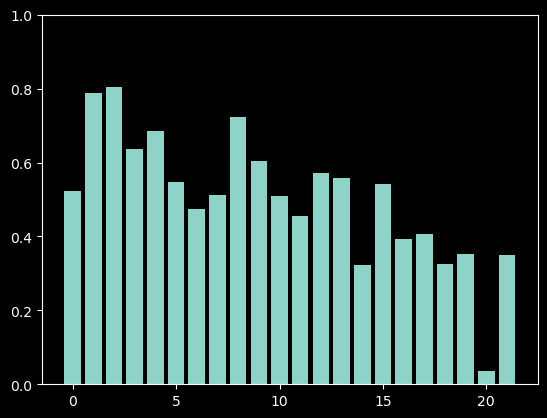

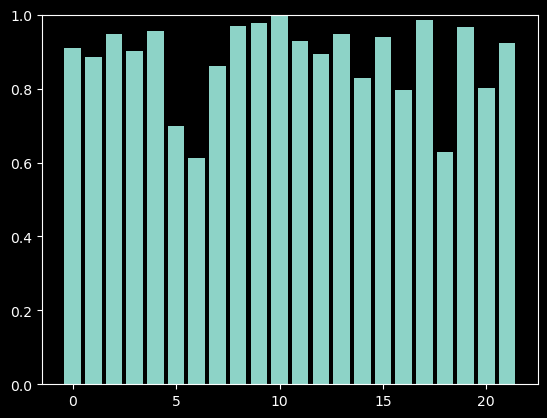

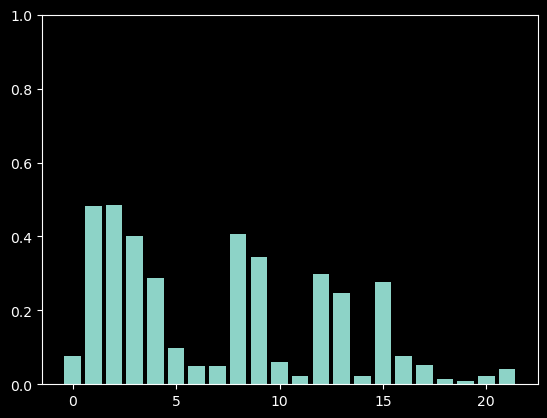

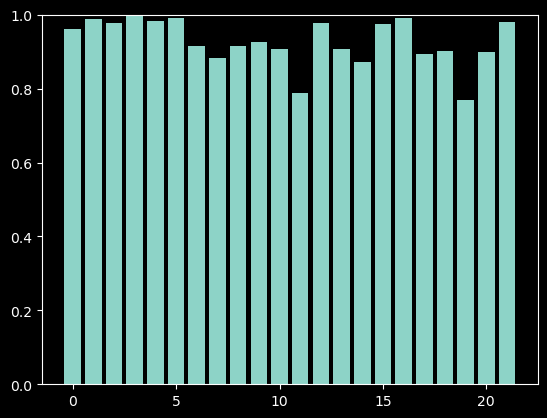

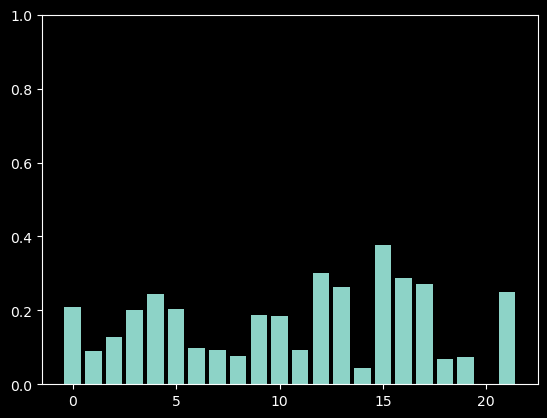

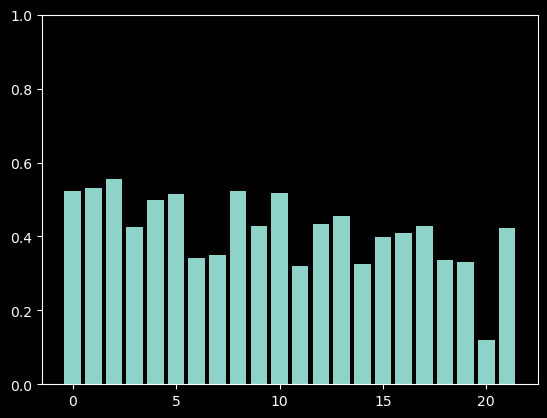

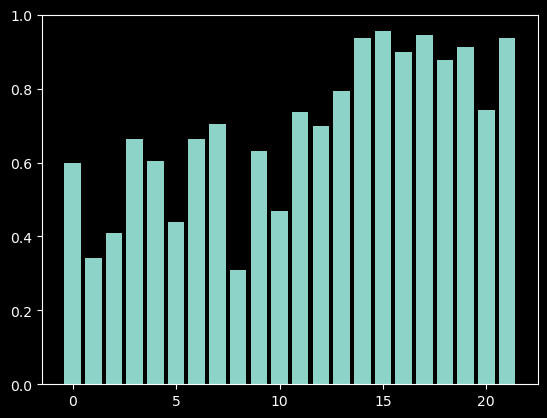

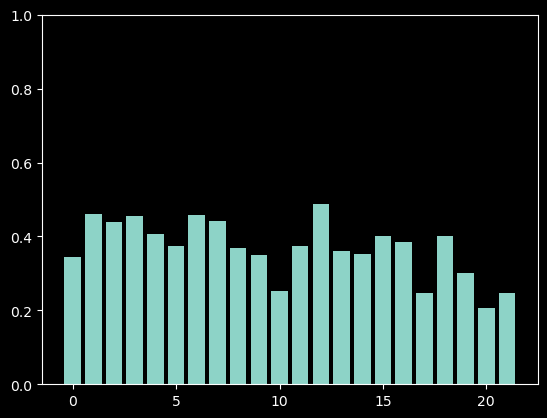

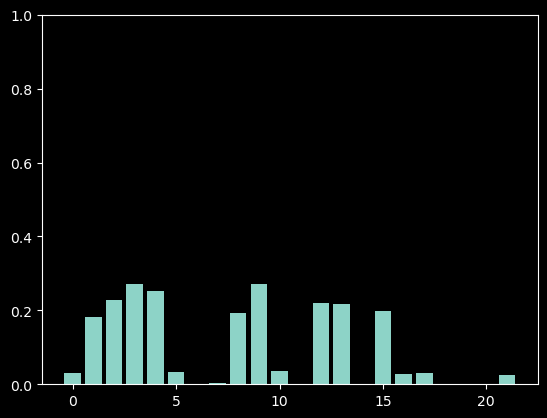

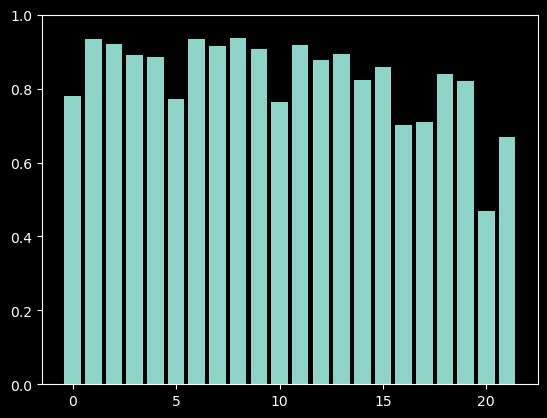

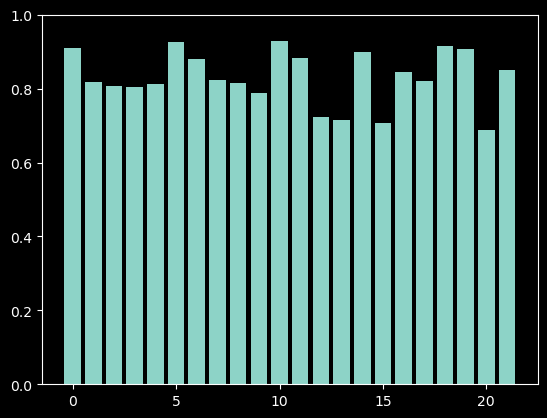

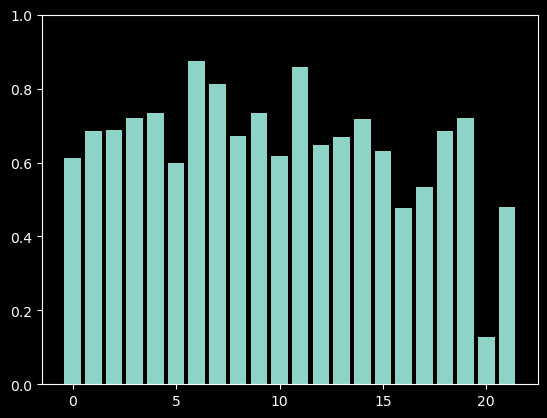

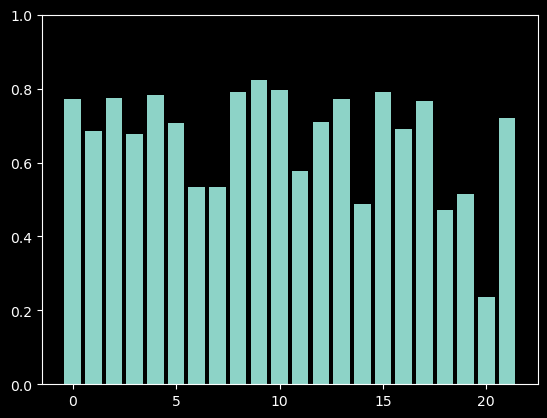

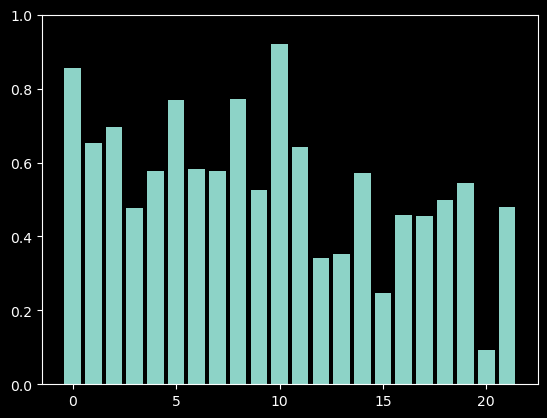

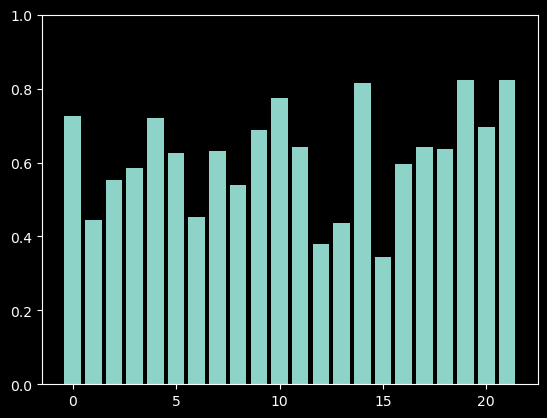

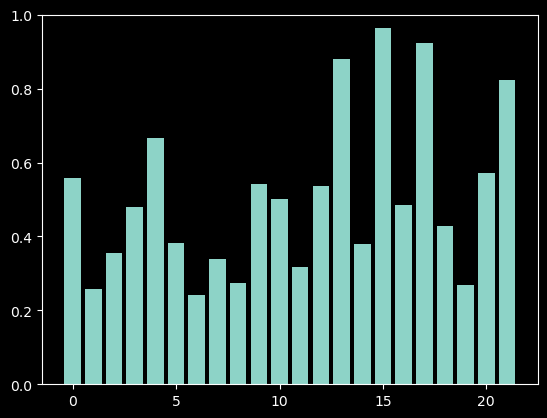

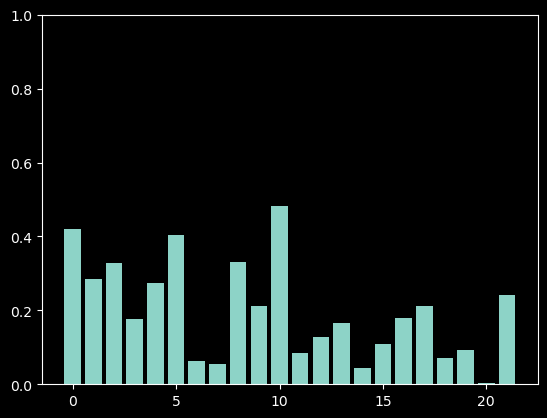

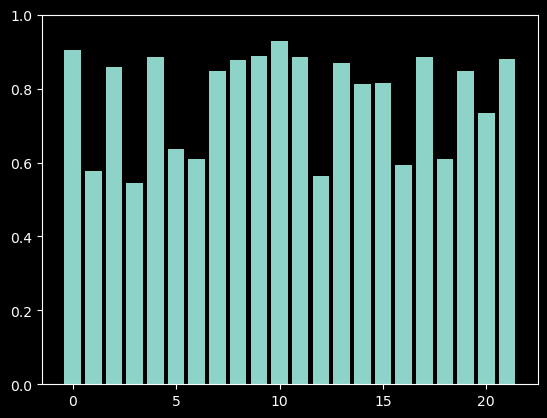

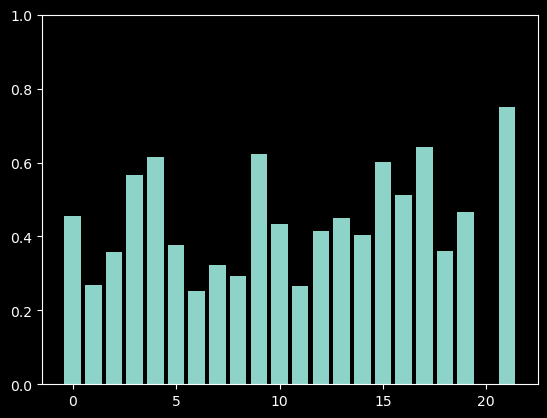

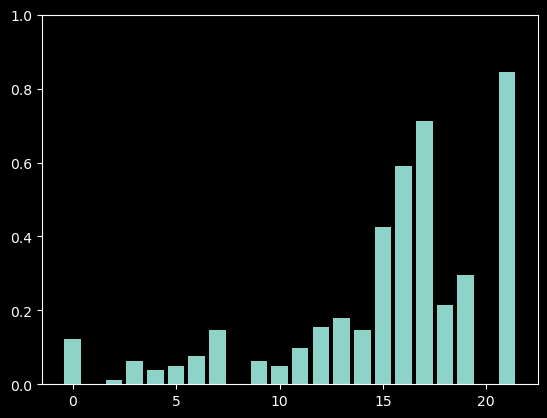

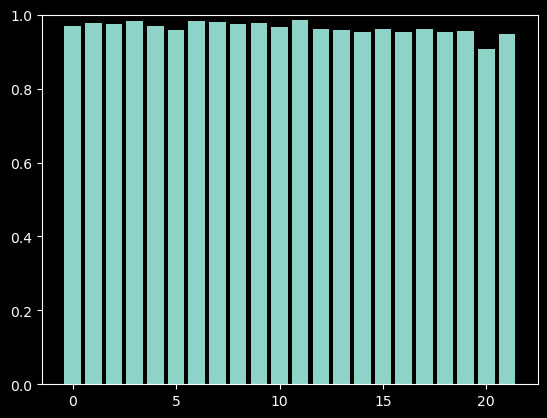

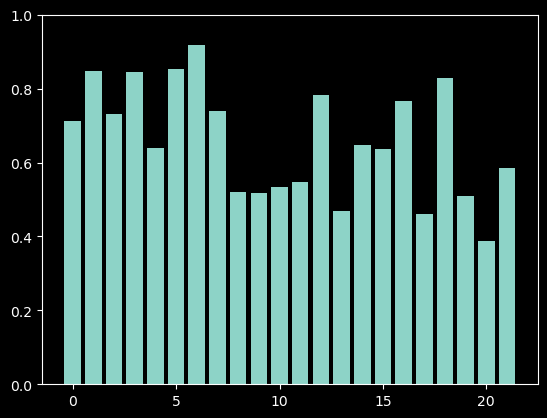

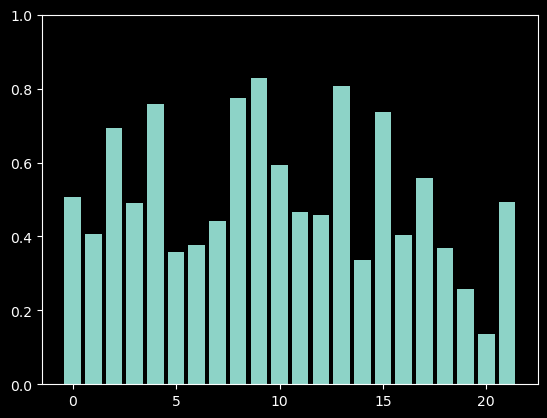

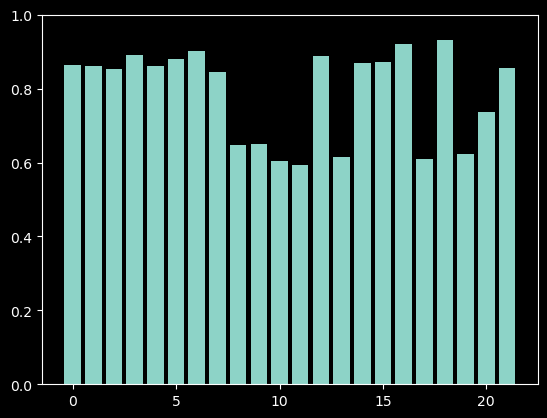

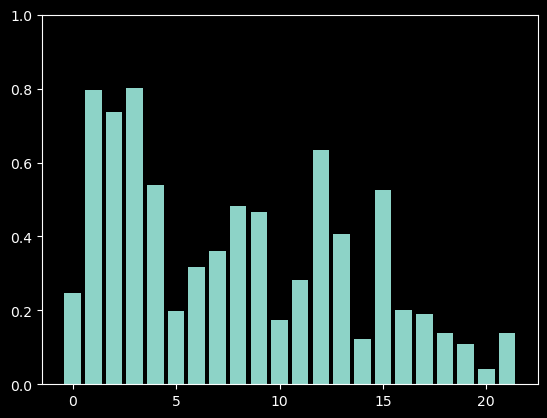

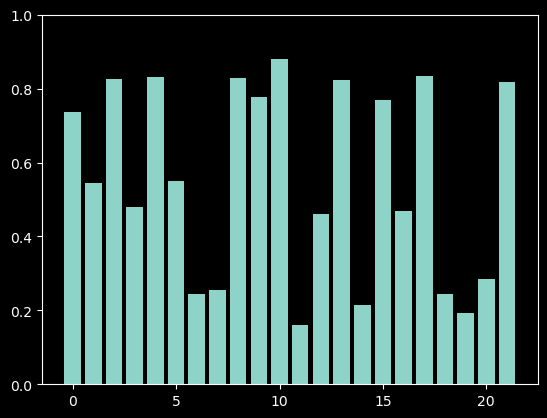

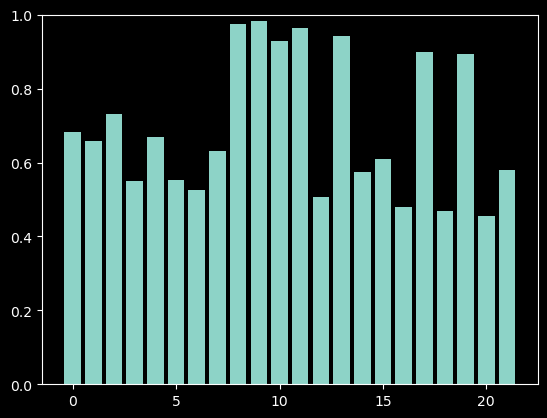

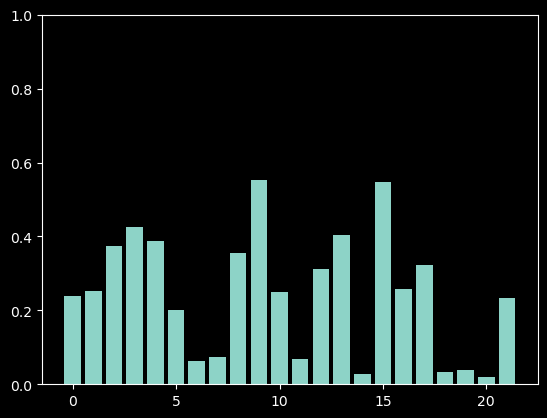

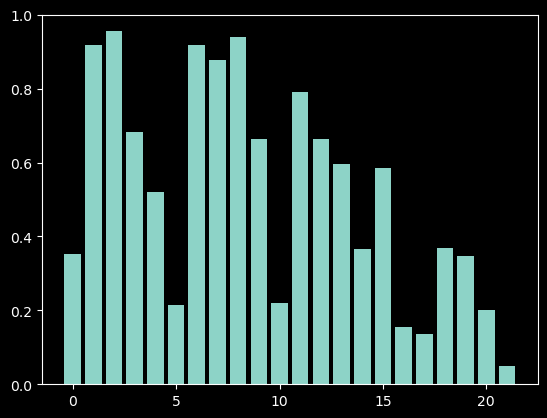

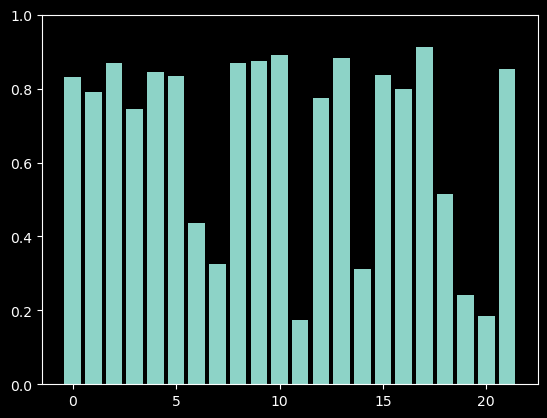

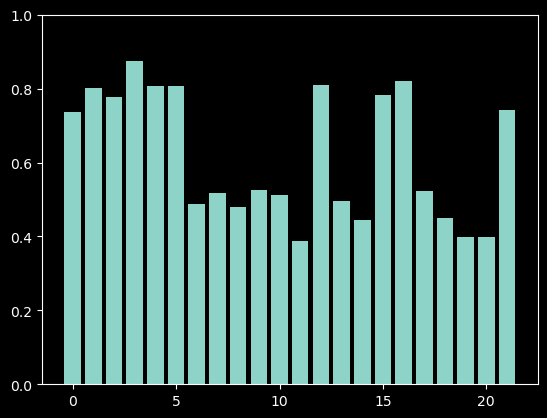

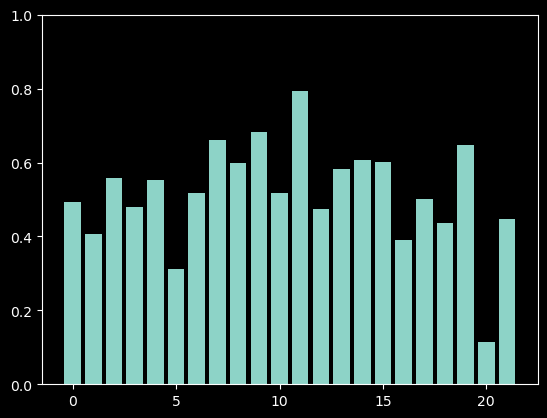

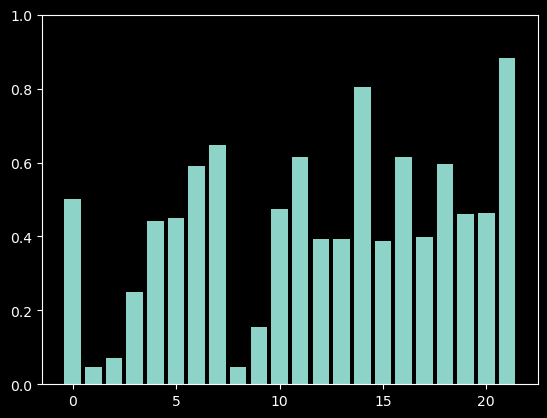

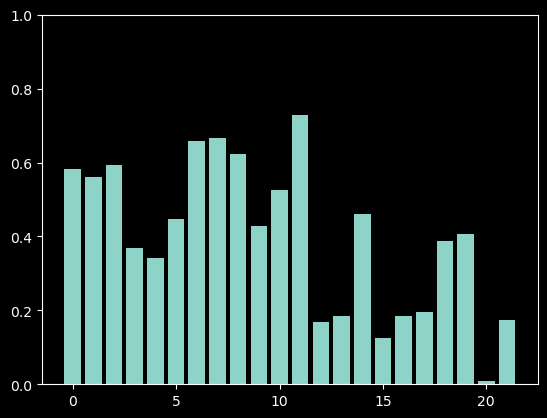

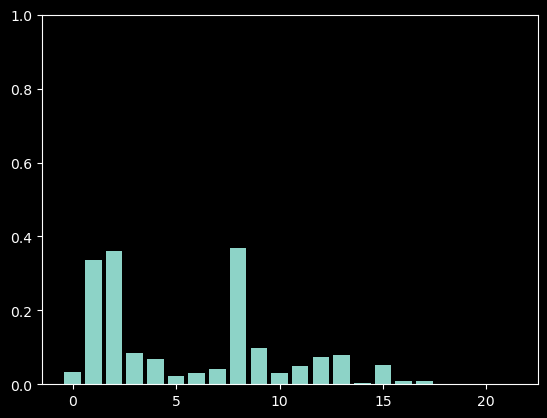

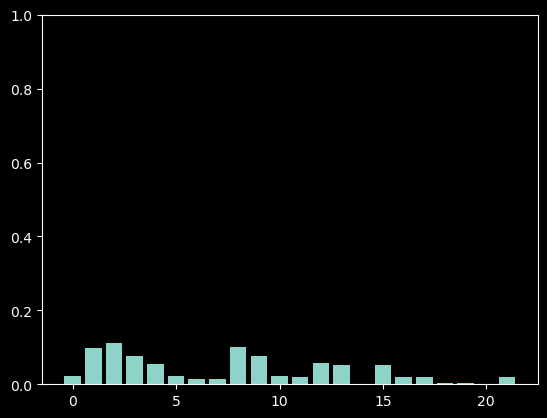

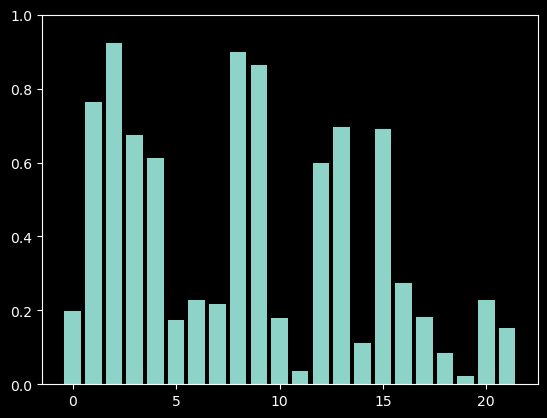

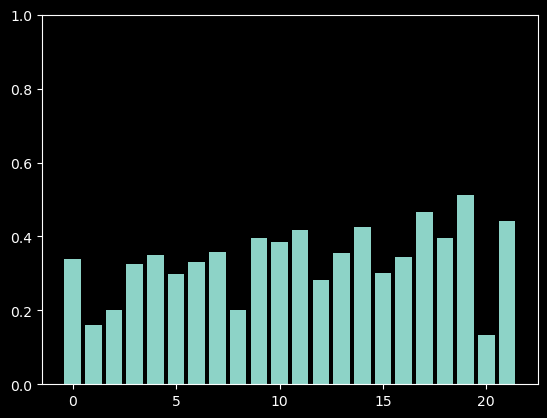

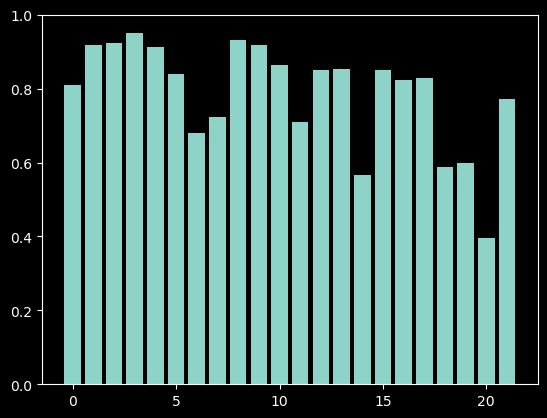

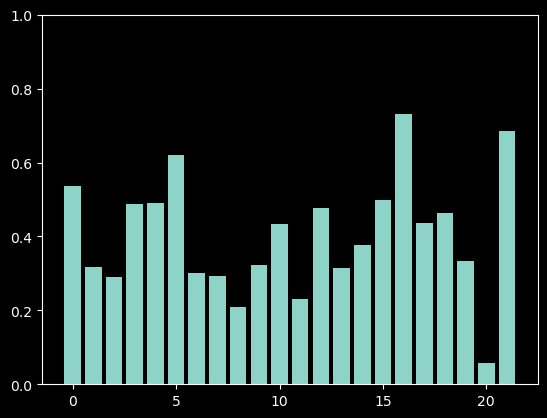

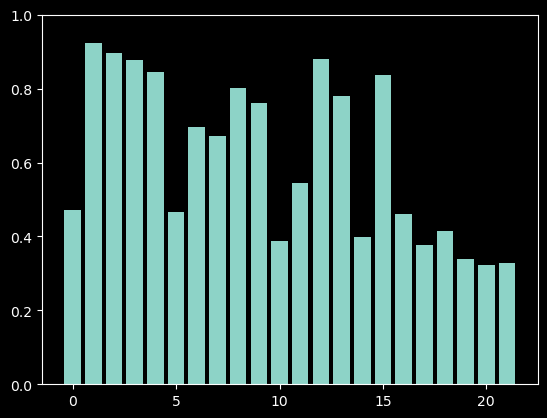

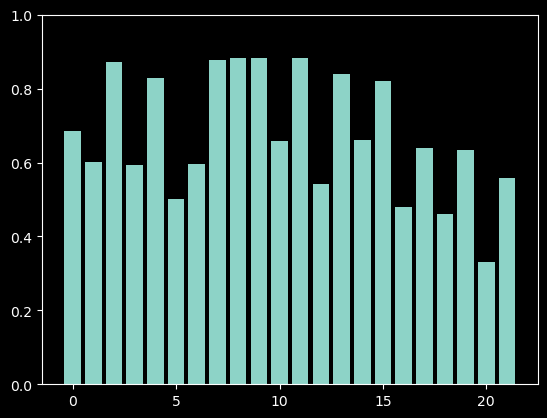

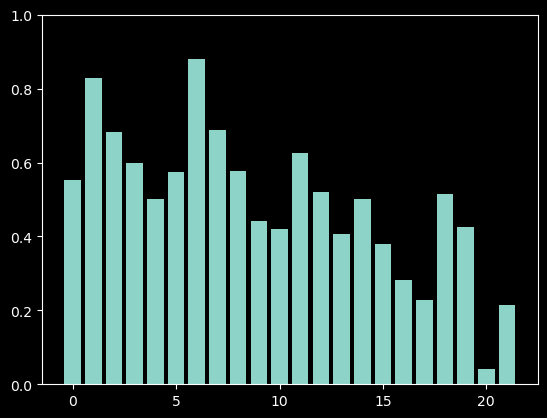

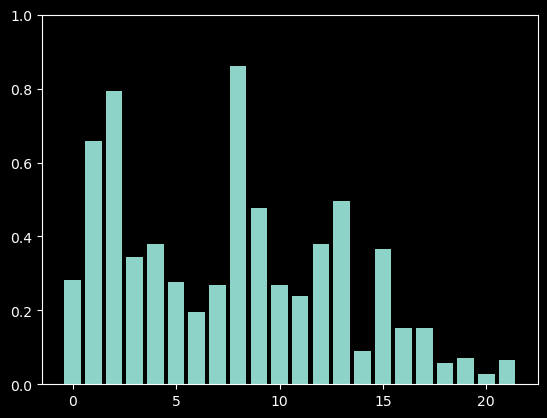

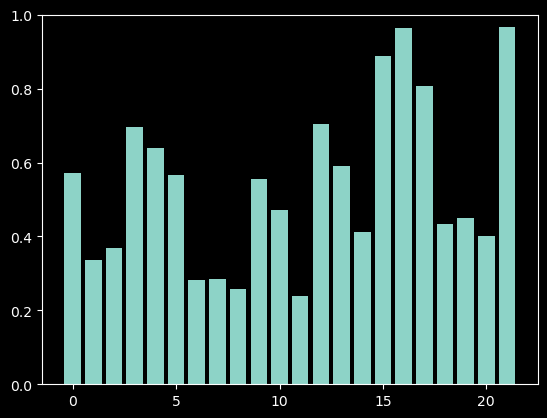

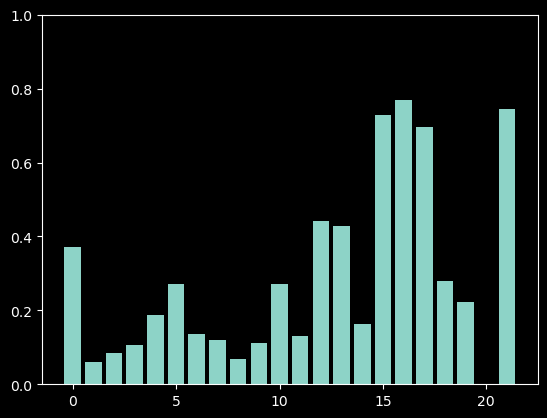

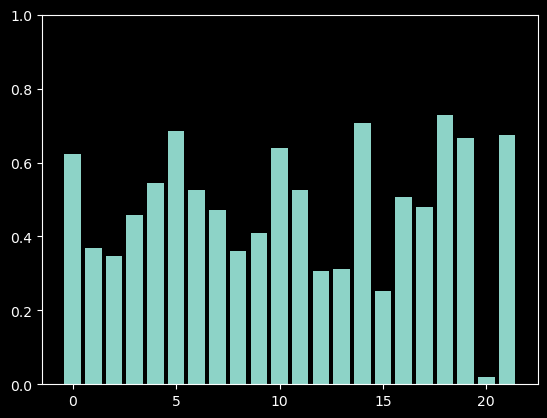

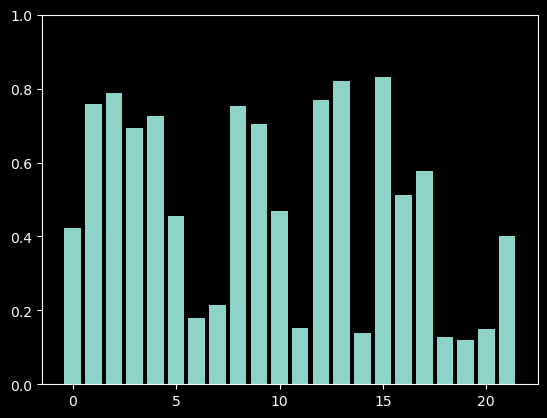

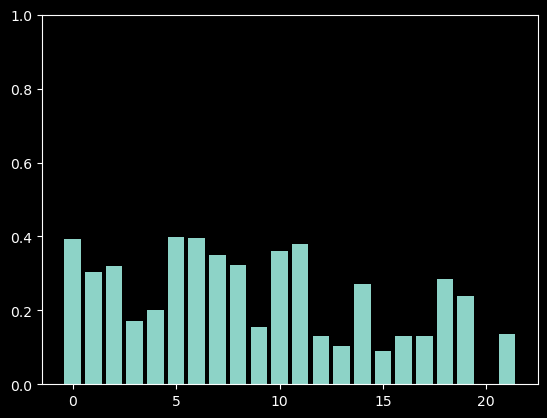

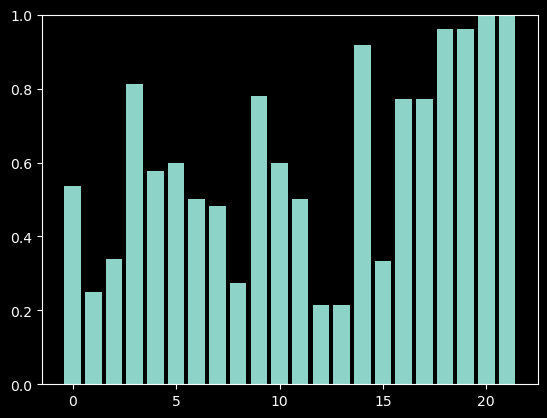

In [141]:
for c in centroids:
    ax = plt.subplot()
    ax.bar(range(len(c)), c)
    ax.set_ylim(0, 1)
    plt.show()